# Story 7
Andrew Bowen     
DATA 608
CUNY Data Science Master's

## Data Sources

- [IEA Critical Minerals Demand Dataset](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset)
- [Global Geochemical Database for Critical Minerals](https://www.sciencebase.gov/catalog/item/5e616381e4b01d509255c7b6)
    - [Download link for CSV data](https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true) (USGS)
- [Diplomatic Relations of the UNited States](https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

I exported the data contained in the `"3.2 Cleantech demand by mineral"` sheet of the [IEA Mineral Projected Demand dataset here](https://www.iea.org/data-and-statistics/data-product/critical-minerals-demand-dataset).

In [2]:
demand = pd.read_excel("data/mineral-projected-demand.xlsx", header=[0,1], 
                   index_col=[0], skiprows=[1])
demand.head()

Table 1       Table 1                                                      \
                 2022         2025         2030         2035         2040   
Boron        0.158618     0.175778     0.314919     0.287788     0.259729   
Cadmium      0.420843     0.420292     0.397562     0.395331     0.411500   
Chromium   181.109000   216.958000   365.130000   314.491000   427.519000   
Copper    5735.860000  6472.900000  9298.250000  9490.560000  9804.580000   
Cobalt      68.176500    69.487200    79.424500    83.869900   110.073000   

Table 1                                                                        \
                  2045          2050       2025.1        2030.1        2035.1   
Boron         0.329544      0.408226     0.226241      0.409879      0.475982   
Cadmium       0.465976      0.503529     0.497073      0.511277      0.570518   
Chromium    331.131000    326.113000   267.617000    527.804000    521.743000   
Copper    10680.900000  10647.500000  7229.460000  11363.700000  13702.900000   
Cobalt      136.270000    145.648000    81.784500    121.603000    168.717000   

Table 1                                                                       \
                2040.1        2045.1        2050.1       2025.2       2030.2   
Boron         0.494596      0.541735      0.643545     0.282352      0.73109   
Cadmium       0.560878      0.599139      0.589951     0.770334      1.22404   
Chromium    606.409000    483.201000    557.908000   407.412000    851.85400   
Copper    15100.300000  15896.700000  15717.200000  8310.130000  15731.60000   
Cobalt      220.562000    261.829000    295.779000   136.819000    205.36100   

Table 1                                                          
               2035.2        2040.2        2045.2        2050.2  
Boron         0.72847      0.691595      0.472797      0.746079  
Cadmium       1.13261      0.954223      0.598829      0.431189  
Chromium    758.03500    721.065000    464.211000    459.105000  
Copper    19518.50000  20678.100000  19091.600000  17351.400000  
Cobalt      248.80700    258.523000    285.248000    290.666000

In [3]:
demand.columns = [str(c[-1]) for c in demand.columns]
demand.head()

,2022,2025,2030,2035,2040,2045,2050,2025.1,2030.1,2035.1,2040.1,2045.1,2050.1,2025.2,2030.2,2035.2,2040.2,2045.2,2050.2
Boron,0.158618,0.175778,0.314919,0.287788,0.259729,0.329544,0.408226,0.226241,0.409879,0.475982,0.494596,0.541735,0.643545,0.282352,0.73109,0.72847,0.691595,0.472797,0.746079
Cadmium,0.420843,0.420292,0.397562,0.395331,0.411500,0.465976,0.503529,0.497073,0.511277,0.570518,0.560878,0.599139,0.589951,0.770334,1.22404,1.13261,0.954223,0.598829,0.431189
Chromium,181.109000,216.958000,365.130000,314.491000,427.519000,331.131000,326.113000,267.617000,527.804000,521.743000,606.409000,483.201000,557.908000,407.412000,851.85400,758.03500,721.065000,464.211000,459.105000
Copper,5735.860000,6472.900000,9298.250000,9490.560000,9804.580000,10680.900000,10647.500000,7229.460000,11363.700000,13702.900000,15100.300000,15896.700000,15717.200000,8310.130000,15731.60000,19518.50000,20678.100000,19091.600000,17351.400000
Cobalt,68.176500,69.487200,79.424500,83.869900,110.073000,136.270000,145.648000,81.784500,121.603000,168.717000,220.562000,261.829000,295.779000,136.819000,205.36100,248.80700,258.523000,285.248000,290.666000


In [4]:
# Breaking out into projecte
year_cols = ["2025", "2030", "2035", "2040", "2045", "2050"]
demand_stated = demand[['2022'] + year_cols]


# Get pledged and Net-Zero dataframes: clean up column names
demand_pledges = demand[[f"{c}.1" for c in year_cols]]
demand_pledges.columns = [c.replace(".1", "") for c in demand_pledges.columns]

demand_net_zero = demand[[f"{c}.2" for c in year_cols]]
demand_net_zero.columns = [c.replace(".2", "") for c in demand_net_zero.columns]
demand_stated.head()

,2022,2025,2030,2035,2040,2045,2050
Boron,0.158618,0.175778,0.314919,0.287788,0.259729,0.329544,0.408226
Cadmium,0.420843,0.420292,0.397562,0.395331,0.411500,0.465976,0.503529
Chromium,181.109000,216.958000,365.130000,314.491000,427.519000,331.131000,326.113000
Copper,5735.860000,6472.900000,9298.250000,9490.560000,9804.580000,10680.900000,10647.500000
Cobalt,68.176500,69.487200,79.424500,83.869900,110.073000,136.270000,145.648000


In [5]:
url = "https://www.sciencebase.gov/catalog/file/get/5e616381e4b01d509255c7b6?f=__disk__9f%2Fe3%2F8b%2F9fe38b3bec1b9bc404b14578a226c080fcecf834&allowOpen=true"

r = requests.get(url)
data = r.text

In [6]:
df = pd.read_csv(StringIO(data))

df.head()

,LAB_ID,PREVIOUS_LAB_ID1,PREVIOUS_LAB_ID2,PREVIOUS_LAB_ID3,FIELD_ID,JOB_ID,PREVIOUS_JOB_ID1,PREVIOUS_JOB_ID2,PREVIOUS_JOB_ID3,SUBMITTER,...,Th_ppm_MS_ST,Tl_ppm_MS_ST,Tm_ppm_MS_ST,U_ppm_MS_ST,V_ppm_AES_ST,W_ppm_MS_ST,Y_ppm_MS_ST,Yb_ppm_MS_ST,Zn_ppm_AES_ST,Zr_ppm_AES_ST
0,C355417,NaN,NaN,NaN,RM0001,MRP11968,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,0.30,51.0,-1.0,-0.5,-0.1,1290.0,3.8
1,C360759,NaN,NaN,NaN,RM0027,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,9.7,0.5,-0.05,1.75,24.0,28.0,2.3,0.3,-5.0,133.0
2,C360762,NaN,NaN,NaN,RM0030,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.08,0.63,-5.0,22.0,5.9,0.6,161.0,16.2
3,C360763,NaN,NaN,NaN,RM0031,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,0.2,-0.5,-0.05,34.80,493.0,11.0,1.9,0.2,29.0,19.1
4,C360769,NaN,NaN,NaN,RM0037,MRP12307,NaN,NaN,NaN,Rare Metals Task,...,2.6,-0.5,0.22,31.20,68.0,8.0,13.0,1.4,4480.0,150.0


In [7]:
# Write USGS data to CSV if desired
# df.to_csv("data/mineral-samples.csv", index=False)

In [8]:
# Mapping countries to whether they are allies, neutral, or hostile
# https://en.wikipedia.org/wiki/Foreign_relations_of_the_United_States

alliance_mapping= {
    'Chile': "Neutral",
    'South Africa': "Ally",
    'Finland': "Ally", 
    'Mexico': "Neutral",
    'Indonesia': "Ally", 
    'Norway': "Ally", 
    'Canada': "Ally",
    'Russia': "Strained Relations", 
    'Japan': "Ally", 
    'Philippines': "Neutral",
    'Peru': "Neutral", 
    'Cuba': "Strained Relations",
    'Australia': "Ally", 
    'Burma': "Neutral", 
    'Portugal': "Ally", 
    'Sweden': "Ally",
    'China': "Strained Relations",
    'Mauritania': "Neutral",
    'Brazil': "Neutral",
    'Argentina': "Neutral", 
    'Germany': "Ally",
    'Namibia': "Neutral",
    'Zambia': "Neutral",
    'India': "Neutral",
    'Poland': "Ally",
    'Democratic Republic of Congo': "Neutral",
    'Vietnam': "Neutral",
    'Papua New Guinea': "Neutral",
    'Honduras': "Neutral"
}
# Map relations to color
color_mapping = {
    "Ally": "b",
    "Strained Relations": "r",
    "Neutral": "g"
}

In [9]:
# Get number of mineral samples produced by country
dat = df.loc[df.COUNTRY != "United States"]

dat = df.groupby("COUNTRY").count()\
    .reset_index()\
    .sort_values("LAB_ID", ascending=False)

dat['relations'] = dat['COUNTRY'].map(alliance_mapping)
dat['relations_color'] = dat['relations'].map(color_mapping)


Text(0.5, 0.98, 'Number of Mineral Samples Produced Internationally')

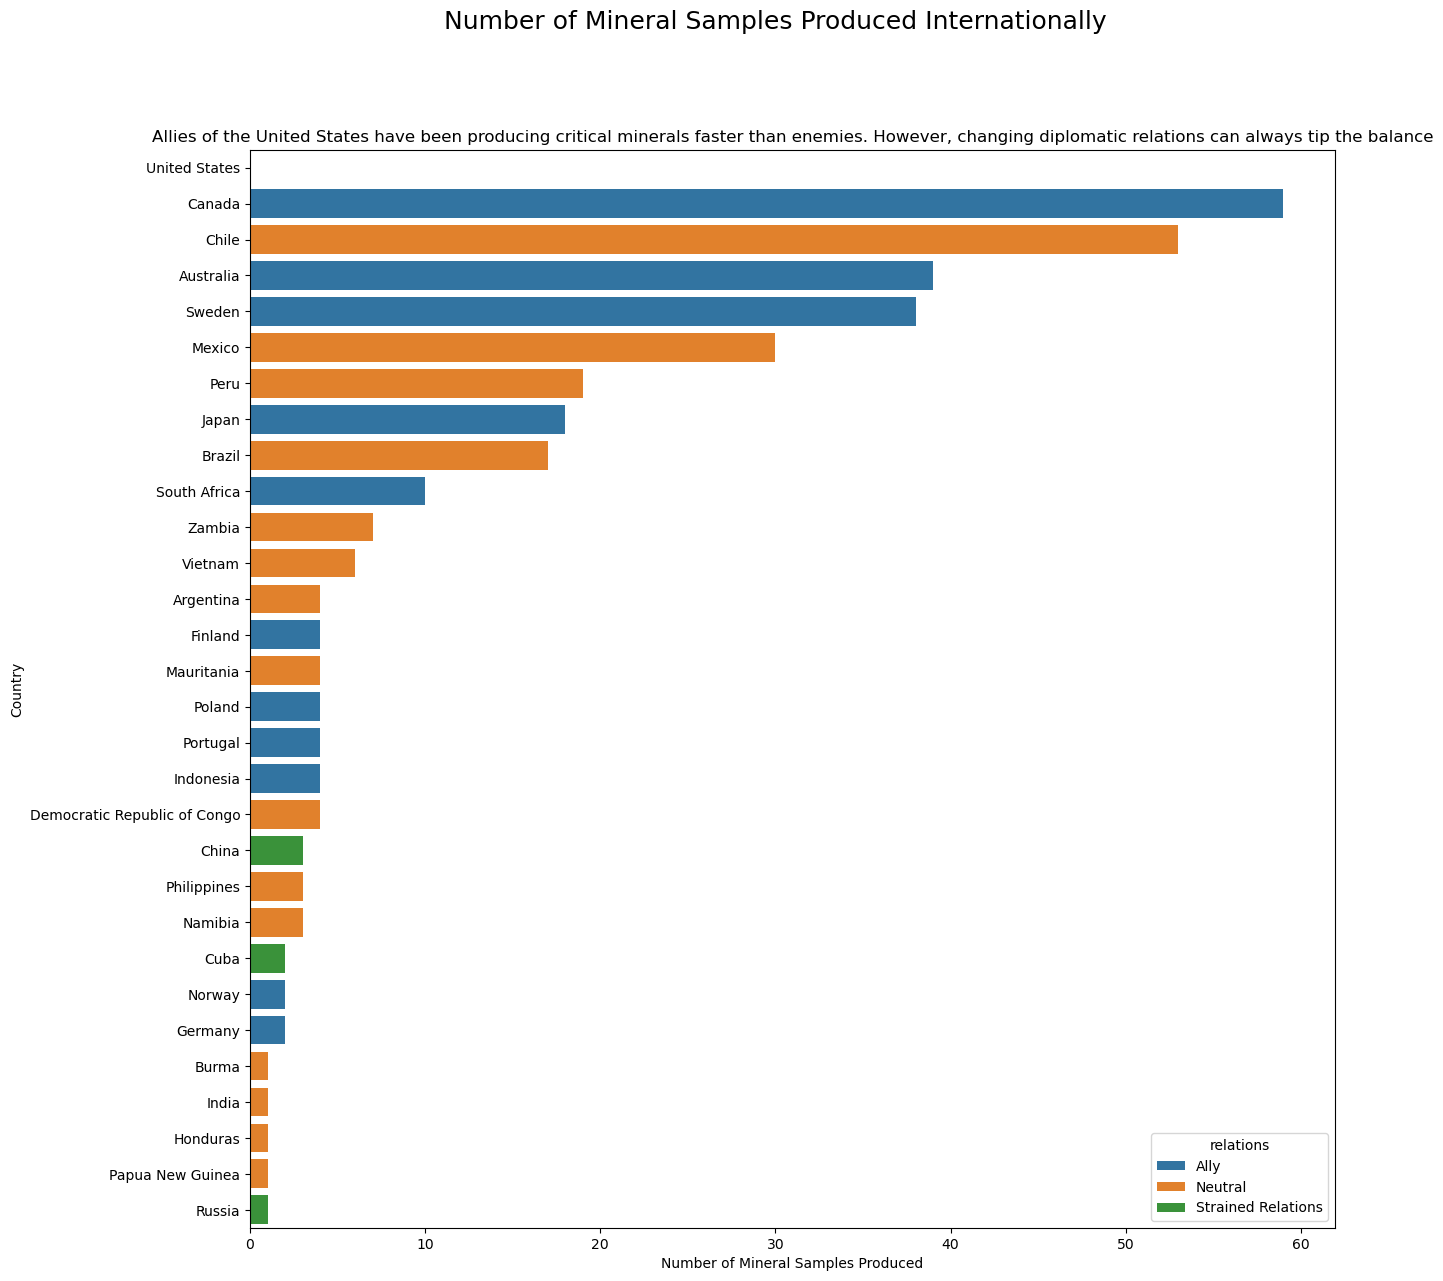

In [10]:
# Plot number of mineral samples per country
f, ax = plt.subplots(figsize=(14, 14))
sns.barplot(x="LAB_ID", y="COUNTRY", data=dat, hue='relations', dodge=False)
plt.xlabel("Number of Mineral Samples Produced")
plt.ylabel("Country")
plt.title("Allies of the United States have been producing critical minerals faster than enemies. However, changing diplomatic relations can always tip the balance")
plt.suptitle("Number of Mineral Samples Produced Internationally", fontsize=18)

In [11]:
#  Getting total mineral demand by year
total_demand = demand_stated.drop("2022", axis=1).sum()
demand_2022 = demand_stated["2022"].sum()
total_pledge_demand = demand_pledges.sum()
total_demand_zero_emissions = demand_net_zero.sum()
total_demand

2025    20856.888478
2030    30633.900114
2035    32544.079321
2040    35585.129155
2045    37903.362894
2050    37540.554727
dtype: float64

One contributor to the rise in demand for critical minerals is the increase of the presence of clean technology. We can use the IEA data to show the projected demand for a few different scenarios

1. If current pledges by countries to meet emissions quotas remain
2. If countries meet their emission pledges
3. If countries were to go neyt-zero emissions by 2050

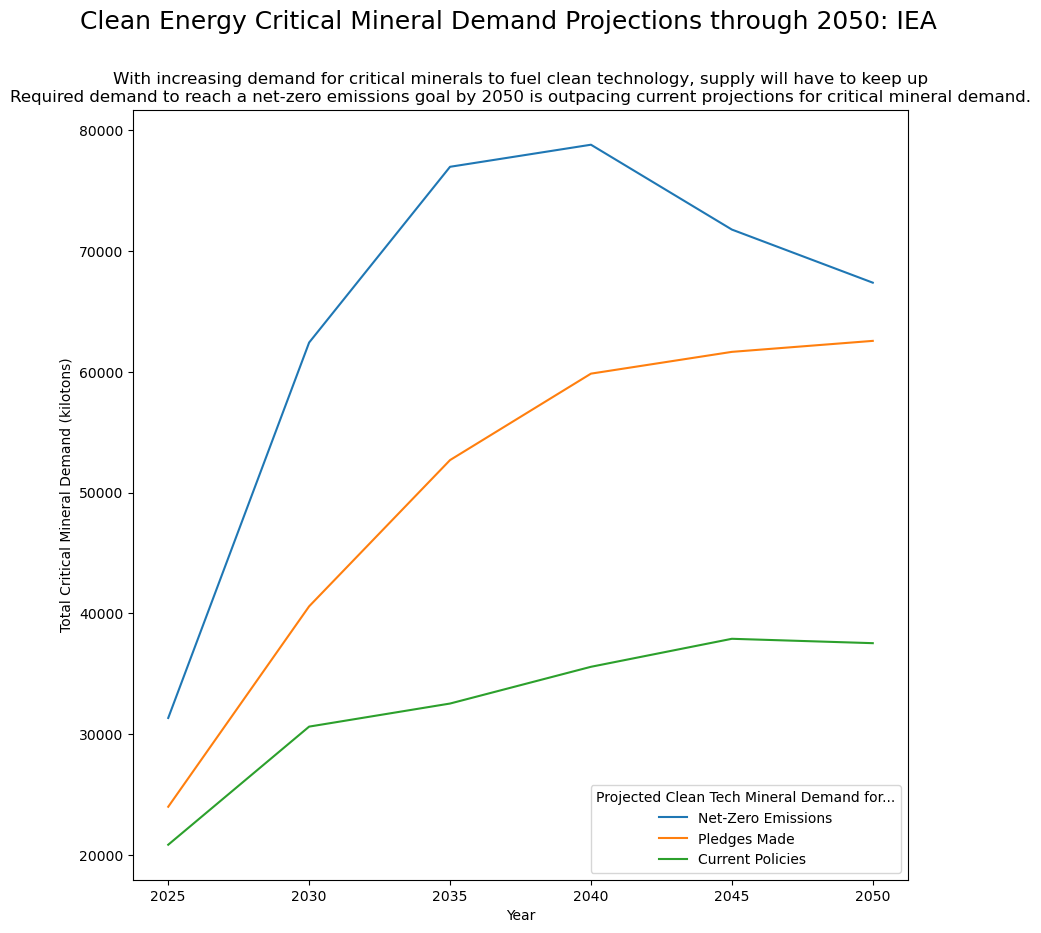

In [12]:
f, ax = plt.subplots(figsize=(10, 10))
plt.plot(total_demand_zero_emissions, label="Net-Zero Emissions")
plt.plot(total_pledge_demand, label="Pledges Made")
plt.plot(total_demand, label="Current Policies")

# Add labels and legend
plt.ylabel("Total Critical Mineral Demand (kilotons)")
plt.xlabel("Year")
plt.suptitle("Clean Energy Critical Mineral Demand Projections through 2050: IEA", fontsize=18)
plt.title("With increasing demand for critical minerals to fuel clean technology, supply will have to keep up\nRequired demand to reach a net-zero emissions goal by 2050 is outpacing current projections for critical mineral demand.")

plt.legend(title="Projected Clean Tech Mineral Demand for...")



In [13]:
key_mineral_demand = pd.read_csv("./data/key-mineral-demand.csv", header=[1], index_col=[0])
key_mineral_demand['mineral'] = key_mineral_demand['Unnamed: 1']
key_mineral_demand['clean_tech'] = key_mineral_demand.index.values
key_mineral_demand.head()

,Unnamed: 1,2022,2025,2030,2035,2040,2045,2050,2025.1,2030.1,...,2045.1,2050.1,2025.2,2030.2,2035.2,2040.2,2045.2,2050.2,mineral,clean_tech
Solar PV,Copper,682,779,907,925,959,1122,1262,923,1177,...,1621,1811,1259,1990,2063,2026,1674,1880,Copper,Solar PV
Wind,Copper,394,428,646,595,532,639,721,541,885,...,996,1107,705,1630,1543,1328,881,1303,Copper,Wind
Other low emissions power generation,Copper,85,69,108,87,85,110,117,79,141,...,160,160,93,225,228,180,148,142,Copper,Other low emissions power generation
Electric vehicles,Copper,373,580,1044,1219,1421,1458,1346,689,1592,...,3241,3307,1152,2704,3799,3884,3897,3583,Copper,Electric vehicles
Grid battery storage,Copper,20,38,83,154,225,238,220,52,130,...,413,444,77,258,441,685,734,665,Copper,Grid battery storage


In [14]:
# Cleaning up columns
year_cols = ["2025", "2030", "2035", "2040", "2045", "2050"]
key_demand_stated = key_mineral_demand[['2022', "mineral"] + year_cols]

# Get pledged and Net-Zero dataframes: clean up column names
key_demand_pledges = key_mineral_demand[['mineral'] + [f"{c}.1" for c in year_cols]]
key_demand_pledges.columns = [c.replace(".1", "") for c in key_demand_pledges.columns]

key_demand_net_zero = key_mineral_demand[['mineral'] + [f"{c}.2" for c in year_cols]]
key_demand_net_zero.columns = [c.replace(".2", "") for c in key_demand_net_zero.columns]

In [15]:
key_demand_net_zero

,mineral,2025,2030,2035,2040,2045,2050
Solar PV,Copper,1259,1990,2063,2026,1674,1880
Wind,Copper,705,1630,1543,1328,881,1303
Other low emissions power generation,Copper,93,225,228,180,148,142
Electric vehicles,Copper,1152,2704,3799,3884,3897,3583
Grid battery storage,Copper,77,258,441,685,734,665
Electricity networks,Copper,5024,8924,11445,12574,11757,9778
Hydrogen technologies,Copper,0,0,0,0,0,0
Low emissions power generation,Cobalt,0,0,0,0,0,0
Electric vehicles,Cobalt,130,188,231,244,278,291
Grid battery storage,Cobalt,6,17,18,14,7,0


In [16]:
minerals = key_mineral_demand.mineral.unique()
cols = ["Solar PV", "Wind", "Other low emissions power generation",
        "Electric vehicles", "Grid battery storage",
        "Electricity networks", "Hydrogen technologies"]

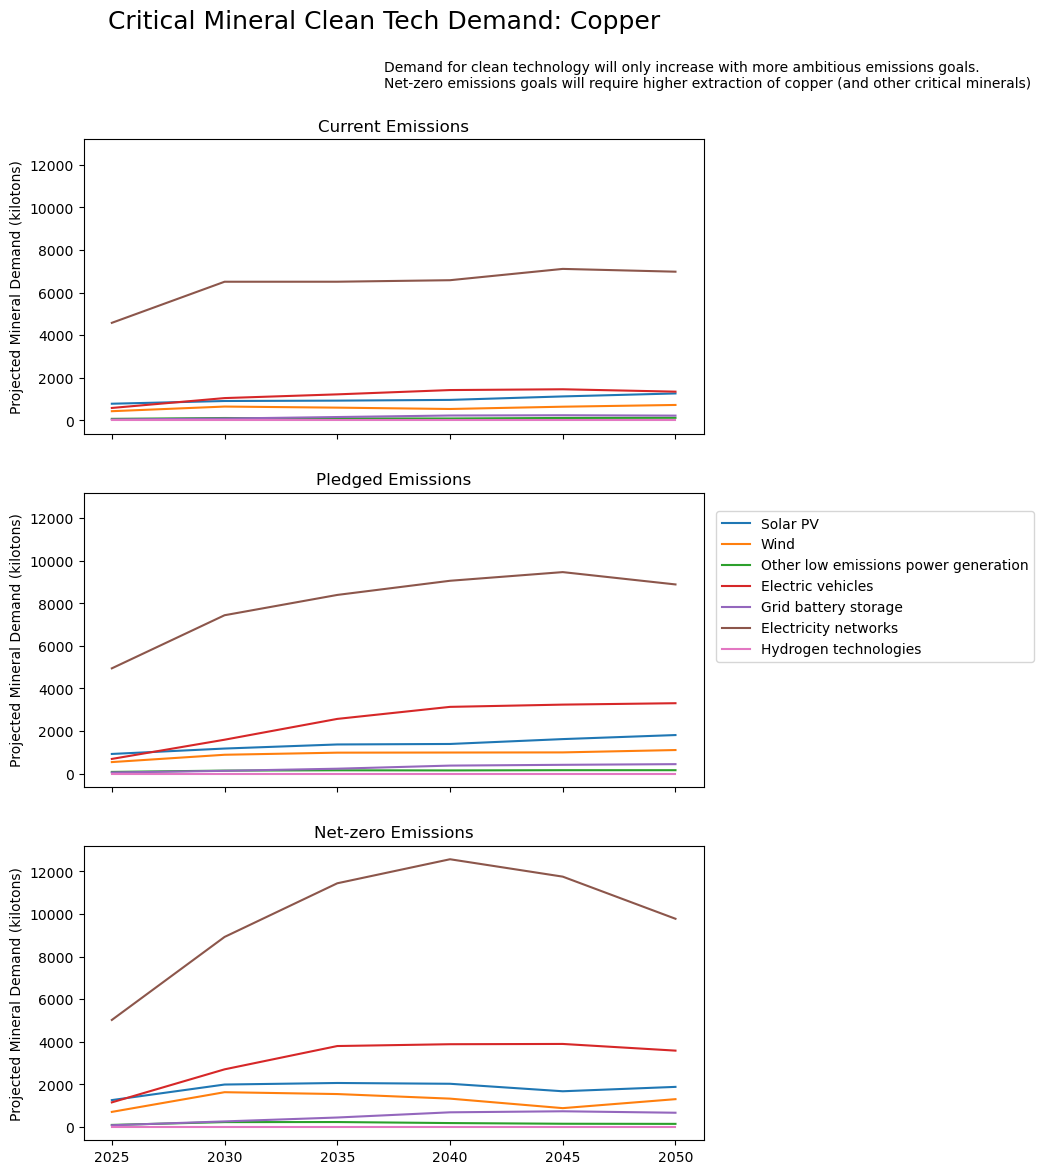

In [30]:
# Plot key mineral demand by clean technology
# TODO: enforce consistent legend across panels
dfs = {"Current Emissions": key_demand_stated.drop("2022", axis=1),
       "Pledged Emissions": key_demand_pledges,
       "Net-zero Emissions": key_demand_net_zero}

f, axes = plt.subplots(3, 1, figsize=(8, 13), sharex=True, sharey=True)
lines = []
# Create an empty list to store legend handles and labels
legend_handles = []
for d, (label, df) in enumerate(dfs.items()):
    # for i, mineral in enumerate(minerals):
    ax = axes[d]
    # mineral = minerals[i]
    dat = df.loc[(df.mineral == "Copper")]# & (df.clean_tech != "Electricity networks")]
    dat = dat.drop("mineral", axis=1).T

    # Plot the data and store the line handle for the legend
    dat.plot(ax=ax)
    
    # remove legend
    ax.set_title(label)
    ax.set_ylabel("Projected Mineral Demand (kilotons)")
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()


# Add a legend to the last subplot
f.legend(handles, labels, loc='center right')
plt.suptitle("Critical Mineral Clean Tech Demand: Copper", fontsize=18)
plt.figtext(0.5, 0.92, "Demand for clean technology will only increase with more ambitious emissions goals.\nNet-zero emissions goals will require higher extraction of copper (and other critical minerals)")

# Show the plot
plt.show()